In [40]:
import numpy as np
import tensorflow as tf
import cv2
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

# Generate Data to train, validate, and test

In [41]:
train_labels =  []
train_samples = []

Example Data:
- A drug was tested on people between 13 and 100 years old
- There are 2100 participants, half under 65, the rest 65 and over
- 95% of participants 65 and older experienced side effects
- 95% of participants under 65 did not experience side effects 

In [42]:
for i in range(50):
  # From the above, ~5% under 65 did experience side effects, this is displayed below
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1) # 1 label means they did have side effects

  # Here ~5% of those 65 and over did not experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0) # 0 label means they did not have side effects

for i in range(1000):
  # the remaining half of the under 65 that are labeled uneffected
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  # the remaining half of the 65 and over that are labeled effected
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

## Setup Training Data, Labels, and 

In [ ]:
for i in train_samples:
  print(i)

In [44]:
train_labels = np.array(train_labels) # convert to numpy array
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples) # Shuffle around the values within each array

In [ ]:
for i in train_labels:
  print(i)

In [46]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

## Define a Keras Model

In [47]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

Below is a simple sequential model, the most common model type, used mainly since it sends input data through each layer till it reaches the end

The top layer or input has a defined shape for the input, we are using a one dimensional array so a single input is valid, image input takes an image size (244, 244)

In [75]:
model = Sequential([
  Dense(units=16, input_shape=(1,), activation='relu'), # Rectified Linear Unit, returns a 1 or 0
  Dense(units=32, activation='relu'),
  Dense(units=2, activation='softmax') # Last layer has units=number of classes, softmax gives percentile values
])

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Prepares the model for training !REQUIRED
model.compile(
  optimizer=Adam(learning_rate=0.0001),
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

In [66]:
model.fit(x=scaler_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=80, shuffle=True, verbose=2)

Epoch 1/80
189/189 - 0s - loss: 0.6772 - accuracy: 0.5360 - val_loss: 0.6717 - val_accuracy: 0.5143 - 428ms/epoch - 2ms/step
Epoch 2/80
189/189 - 0s - loss: 0.6566 - accuracy: 0.5873 - val_loss: 0.6523 - val_accuracy: 0.6238 - 139ms/epoch - 736us/step
Epoch 3/80
189/189 - 0s - loss: 0.6299 - accuracy: 0.6825 - val_loss: 0.6282 - val_accuracy: 0.6857 - 140ms/epoch - 741us/step
Epoch 4/80
189/189 - 0s - loss: 0.6037 - accuracy: 0.7228 - val_loss: 0.6024 - val_accuracy: 0.7048 - 155ms/epoch - 820us/step
Epoch 5/80
189/189 - 0s - loss: 0.5735 - accuracy: 0.7651 - val_loss: 0.5732 - val_accuracy: 0.7571 - 126ms/epoch - 669us/step
Epoch 6/80
189/189 - 0s - loss: 0.5424 - accuracy: 0.7873 - val_loss: 0.5440 - val_accuracy: 0.7762 - 137ms/epoch - 727us/step
Epoch 7/80
189/189 - 0s - loss: 0.5115 - accuracy: 0.8148 - val_loss: 0.5152 - val_accuracy: 0.8143 - 133ms/epoch - 703us/step
Epoch 8/80
189/189 - 0s - loss: 0.4815 - accuracy: 0.8429 - val_loss: 0.4872 - val_accuracy: 0.8286 - 135ms/epoch

# Testing Data

In [51]:
test_labels =  []
test_samples = []

In [52]:
for i in range(20):
    # From the above, ~5% under 65 did experience side effects, this is displayed below
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1) # 1 label means they did have side effects

  # Here ~5% of those 65 and over did not experience side effects
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0) # 0 label means they did not have side effects

for i in range(400):
  # the remaining half of the under 65 that are labeled uneffected
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  # the remaining half of the 65 and over that are labeled effected
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [53]:
test_labels = np.array(test_labels) # convert to numpy array
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples) # Shuffle around the values within each array

In [54]:
scaler_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

### Show predictions of testing data

In [68]:
predictions = model.predict(x=scaler_test_samples, batch_size=10, verbose=0)

In [ ]:
for i in predictions:
  print(i)

In [69]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
for i in rounded_predictions:
  print(i)

In [58]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

### Confusion Matrix plotting

In [71]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [72]:
# plotting function from sklean documentation...useful
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=25)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Noramlized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment='center', color='white' if cm[j, i] > thresh else "black")

  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")


Confusion matrix, without normalization
[[388  32]
 [ 20 400]]


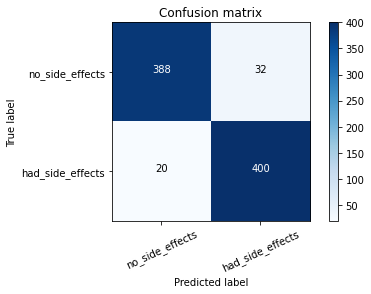

In [73]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

In [ ]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
  model.save('models/medical_trial_model.h5')

# Some ways to import and export models

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [ ]:
new_model.summary()

In [ ]:
new_model.get_weights()

In [ ]:
new_model.optimizer

In [ ]:
json_string = model.to_json()

In [ ]:
json_string

In [ ]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [ ]:
model_architecture.summary()

In [ ]:
model_architecture.optimizer # NO OPTIMIZER OR WEIGHT